<a href="https://colab.research.google.com/github/Vicky-0222/ML/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Для практики №2 взяла датасет "blood" из kaggle.**

# 1. Анализ целевой переменной Y с точки зрения статистики

**1. Импорт необходимых библиотек**

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**2. Загружаем набор данных**

In [26]:
df =  pd.read_csv('/content/blood.csv')

In [27]:
df

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [28]:
# вывод всех колонок
for column in df.columns:
  print(f'колонка: {column}')

колонка: Recency
колонка: Frequency
колонка: Monetary
колонка: Time
колонка: Class


In [29]:
# информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


**3. Проверяем наличие пропущенных значений и работа с пропусками для числовых**

In [30]:
# проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [31]:
# генерирация случайную последовательности
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size = 5, replace = True)]

,Recency,Frequency,Monetary,Time,Class
102,4,9,2250,40,0
435,16,7,1750,93,0
270,16,11,2750,40,0
106,0,8,2000,59,0
71,2,4,1000,16,0


In [32]:
# проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [33]:
# удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [64]:
# Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.Class = df_median.Class.fillna(df_median.Class.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [65]:
# Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.Class = df_mean.Class.fillna(df_median.Class.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


**4. Выбираем целевую переменную**

В качестве целевой переменной взяла переменную expensive_blood, которая была преобразована из Monetary.
Если цена крови >= 1750, то она считается самым дорогим.

In [37]:
df['expensive_blood'] = np.where(df['Monetary'] >= 1750, 1, 0).astype(int)

In [38]:
df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class', 'expensive_blood'], dtype='object')

In [39]:
Y = df['expensive_blood'] # целевая переменная
X = df.drop('expensive_blood', axis=1) # переменные для проверки влияния

X = X.drop('Monetary', axis=1)

**5. Графический анализ**

In [40]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float', 'int64'])
numeric_cols

,Recency,Frequency,Time,Class
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0
...,...,...,...,...
743,23,2,38,0
744,21,2,52,0
745,23,3,62,0
746,39,1,39,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


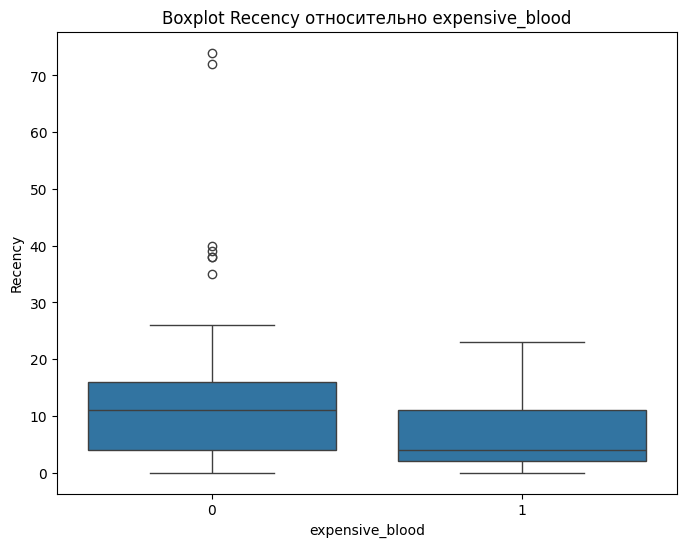

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


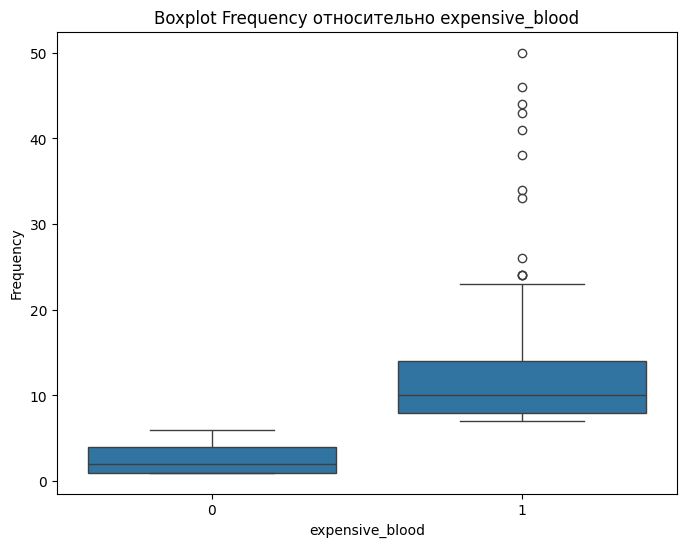

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


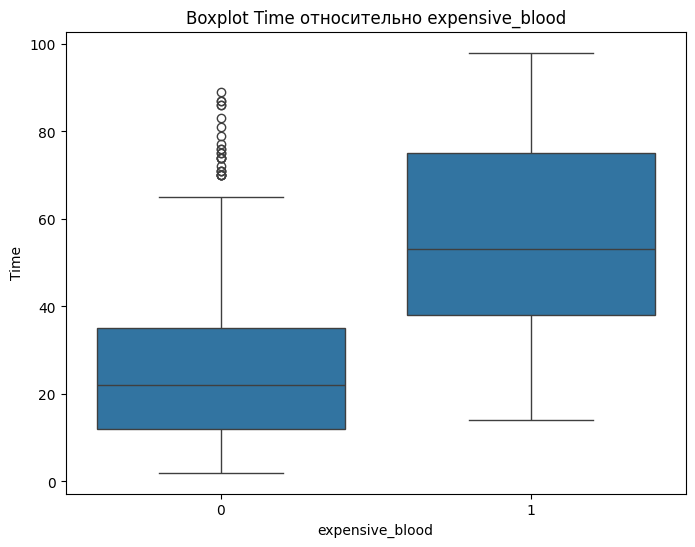

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


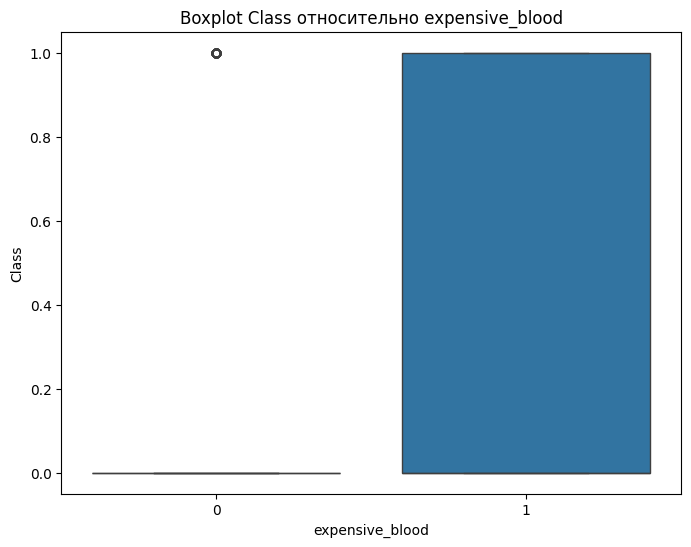

In [41]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='expensive_blood', y=col, data=df)
    plt.title(f'Boxplot {col} относительно expensive_blood')
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

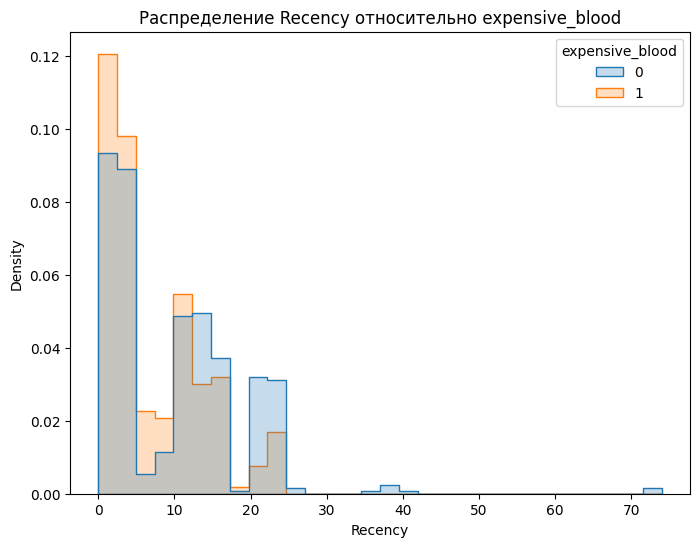

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

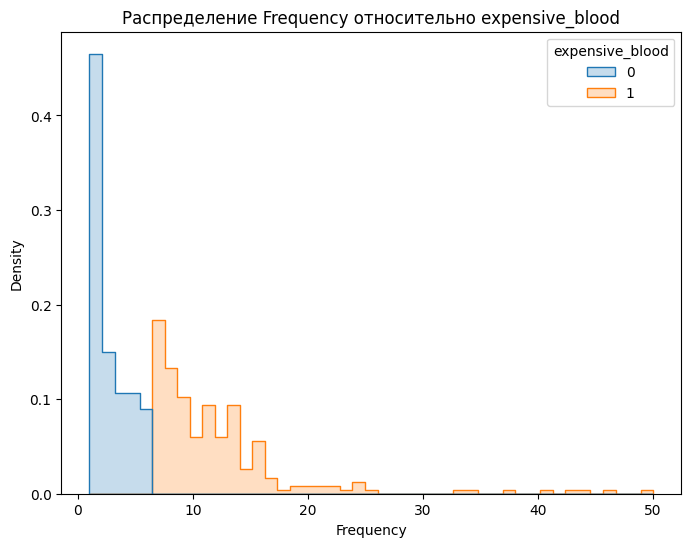

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

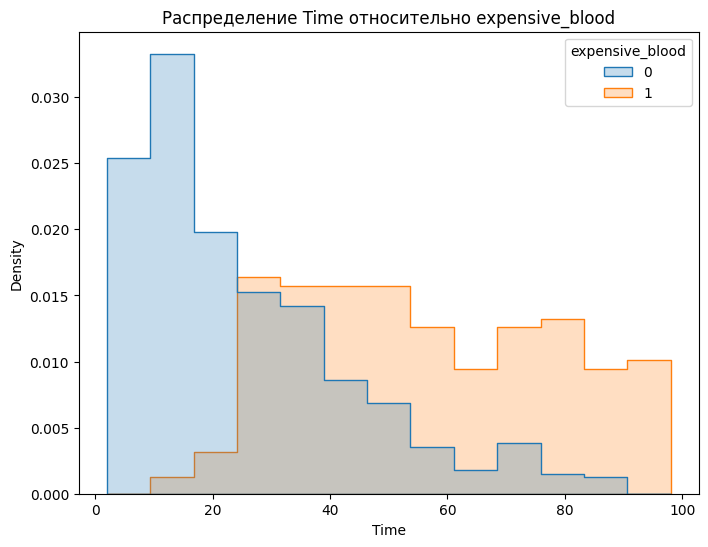

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

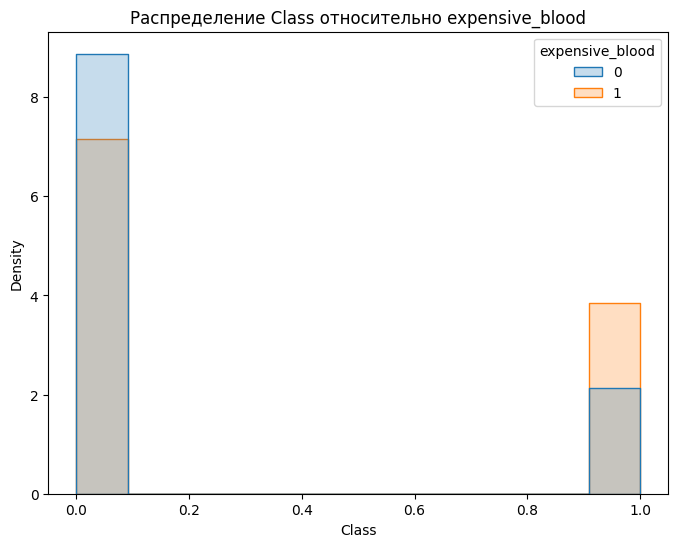

In [42]:
# построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='expensive_blood', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно expensive_blood')
    plt.show()

анализ графиков ⏰⏰⏰❗❗❗

In [66]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('expensive_blood')[df.select_dtypes(include=[np.number]).columns].describe()
desc_stats_numeric

Recency                                                   \
                  count       mean       std  min  25%   50%   75%   max   
expensive_blood                                                            
0                 533.0  10.326454  8.627112  0.0  4.0  11.0  16.0  74.0   
1                 215.0   7.474419  6.157440  0.0  2.0   4.0  11.0  23.0   

                Frequency             ... Class      expensive_blood       \
                    count       mean  ...   75%  max           count mean   
expensive_blood                       ...                                   
0                   533.0   2.838649  ...   0.0  1.0           533.0  0.0   
1                   215.0  12.148837  ...   1.0  1.0           215.0  1.0   

                                               
                 std  min  25%  50%  75%  max  
expensive_blood                                
0                0.0  0.0  0.0  0.0  0.0  0.0  
1                0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 48 columns]

**Описание полученных результатов**

In [67]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('expensive_blood')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для Recency:

                 count       mean       std  min  25%   50%   75%   max
expensive_blood                                                        
0                533.0  10.326454  8.627112  0.0  4.0  11.0  16.0  74.0
1                215.0   7.474419  6.157440  0.0  2.0   4.0  11.0  23.0


Описательная статистика для Frequency:

                 count       mean       std  min  25%   50%   75%   max
expensive_blood                                                        
0                533.0   2.838649  1.683692  1.0  1.0   2.0   4.0   6.0
1                215.0  12.148837  7.065527  7.0  8.0  10.0  14.0  50.0


Описательная статистика для Time:

                 count       mean        std   min   25%   50%   75%   max
expensive_blood                                                           
0                533.0  25.410882  19.083563   2.0  12.0  22.0  35.0  89.0
1                215.0  56.274419  22.066892  14.0  38.0  53.0  75.0  98.0


Описа

описать результаты⏰⏰⏰

сделать вывод

# 2. Расчет теста Пирсона

**1. Рассчитайте коэффициенты корреляции Пирсона для каждого признака**

In [45]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Recency,Frequency,Monetary,Time,Class,expensive_blood
Recency,1.000000,-0.182745,-0.182745,0.160618,-0.279869,-0.159547
Frequency,-0.182745,1.000000,1.000000,0.634940,0.218633,0.722053
Monetary,-0.182745,1.000000,1.000000,0.634940,0.218633,0.722053
Time,0.160618,0.634940,0.634940,1.000000,-0.035854,0.573380
Class,-0.279869,0.218633,0.218633,-0.035854,1.000000,0.165356
expensive_blood,-0.159547,0.722053,0.722053,0.573380,0.165356,1.000000


2. Интерпретируйте результаты

#3. Машинное обучение

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [51]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['Recency', 'Frequency', 'Time', 'Class']


In [52]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True)

In [53]:
X_processed

,Recency_1,Recency_2,Recency_3,Recency_4,Recency_5,Recency_6,Recency_7,Recency_8,Recency_9,Recency_10,...,Time_82,Time_83,Time_86,Time_87,Time_88,Time_89,Time_93,Time_95,Time_98,Class_1
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
744,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
745,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
746,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [57]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9983
Точность на тестовой выборке: 1.0000

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        43

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [58]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


         Feature  Coefficient
35   Frequency_7     3.056906
37   Frequency_9     2.682563
36   Frequency_8     2.597117
39  Frequency_11     2.464752
31   Frequency_3    -2.215028
..           ...          ...
87       Time_33    -0.006734
67       Time_12     0.000000
50  Frequency_22     0.000000
72       Time_17     0.000000
27    Recency_40     0.000000

[140 rows x 2 columns]


# 4. Построение модели логистической регрессии

In [59]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9813
Отклонение точности: 0.0089


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

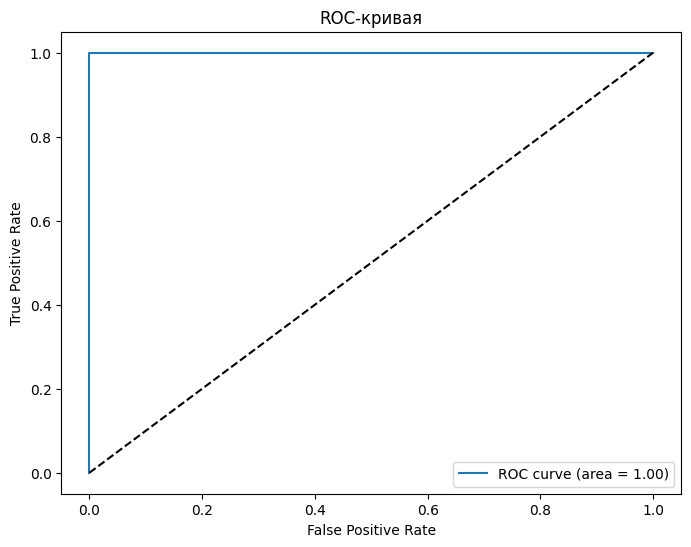

In [61]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

#Дополнительное задание